In [30]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [31]:
# Update with the actual file name from Step 2
file_path = "2013(June)-september-2023-cleaned.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Display first few rows
print(df.head())


   Unnamed: 0            Commodity        Date Unit  Minimum  Maximum  Average
0           0   Tomato Big(Nepali)  2013-06-16   kg     35.0     40.0     37.5
1           1  Tomato Small(Local)  2013-06-16   kg     26.0     32.0     29.0
2           2           Potato Red  2013-06-16   kg     20.0     21.0     20.5
3           3         Potato White  2013-06-16   kg     15.0     16.0     15.5
4           4   Onion Dry (Indian)  2013-06-16   kg     28.0     30.0     29.0


In [32]:
df1 = df.copy()
df1 = df1.drop("Unnamed: 0",axis=1)
df1.head()

,Commodity,Date,Unit,Minimum,Maximum,Average
0,Tomato Big(Nepali),2013-06-16,kg,35.0,40.0,37.5
1,Tomato Small(Local),2013-06-16,kg,26.0,32.0,29.0
2,Potato Red,2013-06-16,kg,20.0,21.0,20.5
3,Potato White,2013-06-16,kg,15.0,16.0,15.5
4,Onion Dry (Indian),2013-06-16,kg,28.0,30.0,29.0


In [33]:
df1.describe()

,Minimum,Maximum,Average
count,293641.000000,293641.000000,293641.000000
mean,96.316206,107.631008,102.094267
std,92.253919,101.631460,96.977592
min,0.000000,0.000000,0.000000
25%,40.000000,50.000000,45.000000
50%,70.000000,75.000000,72.500000
75%,110.000000,120.000000,116.670000
max,2800.000000,3000.000000,2900.000000


In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293641 entries, 0 to 293640
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Commodity  293641 non-null  object 
 1   Date       293641 non-null  object 
 2   Unit       293641 non-null  object 
 3   Minimum    293641 non-null  float64
 4   Maximum    293641 non-null  float64
 5   Average    293641 non-null  float64
dtypes: float64(3), object(3)
memory usage: 13.4+ MB


In [35]:
df1.isnull().sum()

Commodity    0
Date         0
Unit         0
Minimum      0
Maximum      0
Average      0
dtype: int64

In [36]:
## type of commodity
df1['Commodity'].value_counts()

Cauli Local            3741
Ginger                 3741
Chilli Dry             3738
Banana                 3733
Coriander Green        3732
                       ... 
Tree Tomato             109
Water Melon(Dotted)      64
Maize                    24
Sweet Lime               23
Musk Melon               10
Name: Commodity, Length: 136, dtype: int64

In [37]:
## number of commodity
len(df1['Commodity'].value_counts())

136

there are 136 different types of commodity

In [38]:
df1.head()

,Commodity,Date,Unit,Minimum,Maximum,Average
0,Tomato Big(Nepali),2013-06-16,kg,35.0,40.0,37.5
1,Tomato Small(Local),2013-06-16,kg,26.0,32.0,29.0
2,Potato Red,2013-06-16,kg,20.0,21.0,20.5
3,Potato White,2013-06-16,kg,15.0,16.0,15.5
4,Onion Dry (Indian),2013-06-16,kg,28.0,30.0,29.0


In [39]:
type(df1['Date'][0])


str

In [40]:
df1['Date'] = pd.to_datetime(df1['Date'])
type(df1['Date'][0])


pandas._libs.tslibs.timestamps.Timestamp

In [41]:
# Create new features like day of the year, month, or hour if necessary
df1['days'] = df1['Date'].dt.day
df1['Month'] = df1['Date'].dt.month
df1['Year'] = df1['Date'].dt.year
df1.head()

,Commodity,Date,Unit,Minimum,Maximum,Average,days,Month,Year
0,Tomato Big(Nepali),2013-06-16,kg,35.0,40.0,37.5,16,6,2013
1,Tomato Small(Local),2013-06-16,kg,26.0,32.0,29.0,16,6,2013
2,Potato Red,2013-06-16,kg,20.0,21.0,20.5,16,6,2013
3,Potato White,2013-06-16,kg,15.0,16.0,15.5,16,6,2013
4,Onion Dry (Indian),2013-06-16,kg,28.0,30.0,29.0,16,6,2013


In [42]:
## year group 
time = df1.groupby("Year")['Commodity'].count()
time= pd.DataFrame(time)
time=time.reset_index()
time


,Year,Commodity
0,2013,10896
1,2014,22170
2,2015,25161
3,2016,25596
4,2017,24124
5,2018,23295
6,2019,26197
7,2020,26622
8,2021,47387
9,2022,35084


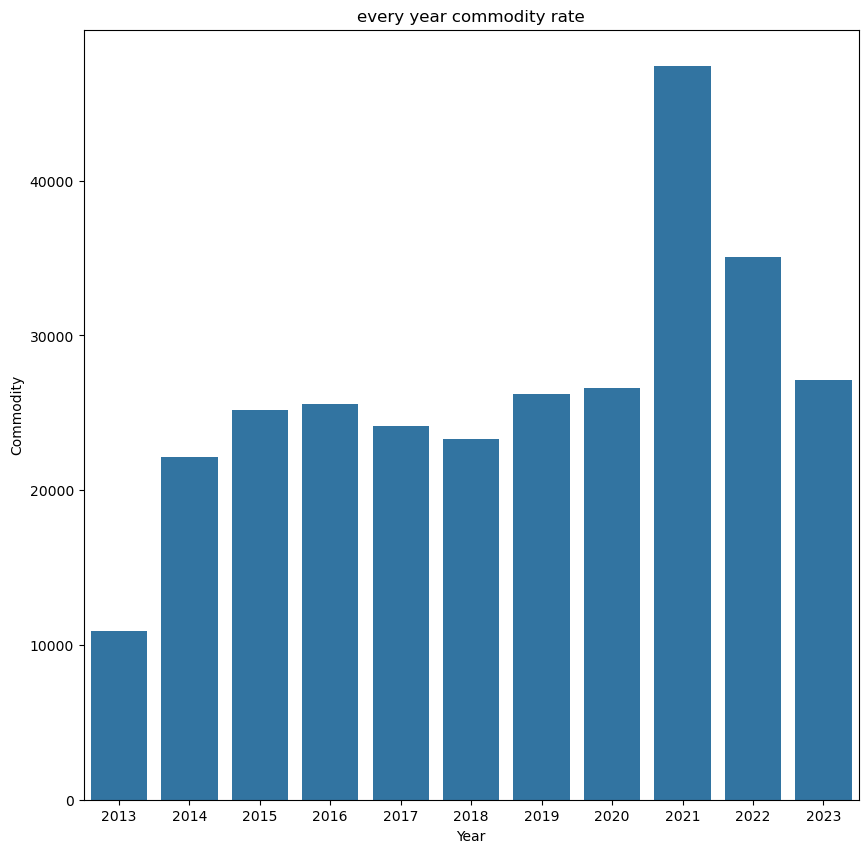

In [43]:
## barplot of every year commodity
plt.figure(figsize=(10,10))
sns.barplot(y=time['Commodity'],x=time['Year'])
plt.title("every year commodity rate")
plt.show()

In [44]:
df1.head()

,Commodity,Date,Unit,Minimum,Maximum,Average,days,Month,Year
0,Tomato Big(Nepali),2013-06-16,kg,35.0,40.0,37.5,16,6,2013
1,Tomato Small(Local),2013-06-16,kg,26.0,32.0,29.0,16,6,2013
2,Potato Red,2013-06-16,kg,20.0,21.0,20.5,16,6,2013
3,Potato White,2013-06-16,kg,15.0,16.0,15.5,16,6,2013
4,Onion Dry (Indian),2013-06-16,kg,28.0,30.0,29.0,16,6,2013


In [45]:
df1[df1['Year']==2013]

,Commodity,Date,Unit,Minimum,Maximum,Average,days,Month,Year
0,Tomato Big(Nepali),2013-06-16,kg,35.0,40.0,37.5,16,6,2013
1,Tomato Small(Local),2013-06-16,kg,26.0,32.0,29.0,16,6,2013
2,Potato Red,2013-06-16,kg,20.0,21.0,20.5,16,6,2013
3,Potato White,2013-06-16,kg,15.0,16.0,15.5,16,6,2013
4,Onion Dry (Indian),2013-06-16,kg,28.0,30.0,29.0,16,6,2013
...,...,...,...,...,...,...,...,...,...
10891,Garlic Dry Chinese,2013-12-31,kg,100.0,105.0,102.5,31,12,2013
10892,Garlic Dry Nepali,2013-12-31,kg,85.0,90.0,87.5,31,12,2013
10893,Clive Dry,2013-12-31,kg,150.0,160.0,155.0,31,12,2013
10894,Clive Green,2013-12-31,kg,110.0,120.0,115.0,31,12,2013


In [46]:

def function(a) :
    a = df1[df1['Year']==a]
    return a

In [47]:
for a in range(2013,2023):
    globals()[f"year{a}"]=function(a)
    
    

In [48]:
## every year commodity types
for a in range(2013,2023):
    b = len(globals()[f"year{a}"]['Commodity'].value_counts())
    
    print([a,b])

[2013, 89]
[2014, 94]
[2015, 94]
[2016, 91]
[2017, 87]
[2018, 86]
[2019, 117]
[2020, 125]
[2021, 132]
[2022, 133]


number is commodity variety is increasing in every year

In [49]:
## every year high and lower price product 
year2013['Commodity'].value_counts()

Tomato Big(Nepali)    157
Potato Red            157
Potato White          157
Onion Dry (Indian)    157
Lime                  157
                     ... 
Knolkhol               11
Cauli Terai            10
Drumstick               9
Sweet Lime              3
Mandarin                2
Name: Commodity, Length: 89, dtype: int64

In [50]:
indian2013 = df1[df1['Commodity'].str.contains("indian",case=False,na=False)]
indian2013['Commodity'].value_counts()

Onion Dry (Indian)      3711
Papaya(Indian)          1629
Potato Red(Indian)      1512
Tomato Big(Indian)      1395
Tomato Small(Indian)     887
Orange(Indian)           761
Litchi(Indian)           141
Name: Commodity, dtype: int64

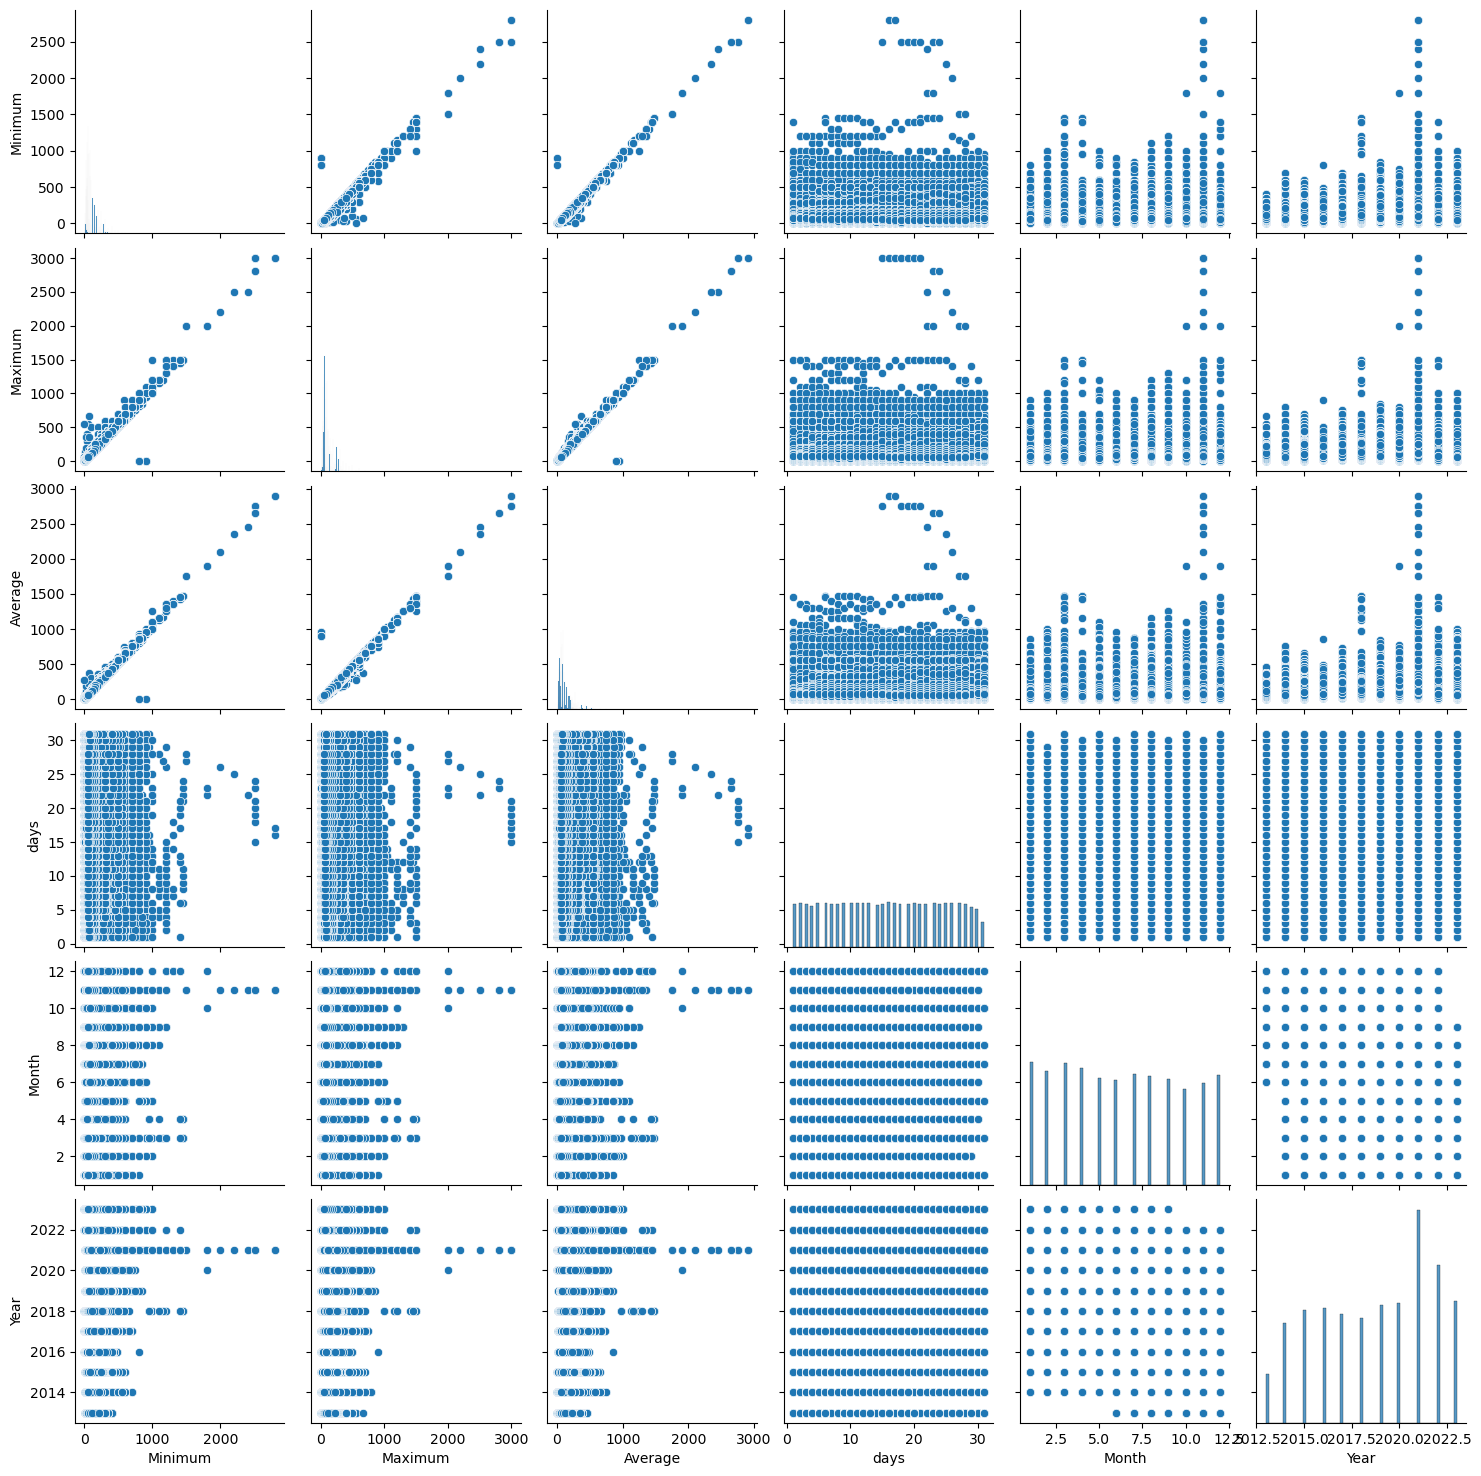

In [51]:
sns.pairplot(df1)

In [58]:

# Ensure correct data types
df1['Year'] = df1['Year'].astype(int)
df1['Average'] = df1['Average'].astype(float)

# Dictionary to store results
top_high_prices = {}
top_low_prices = {}

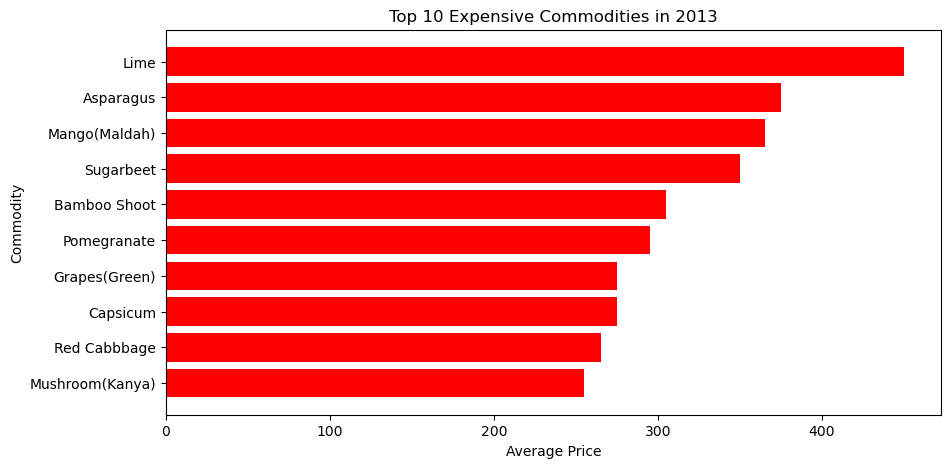

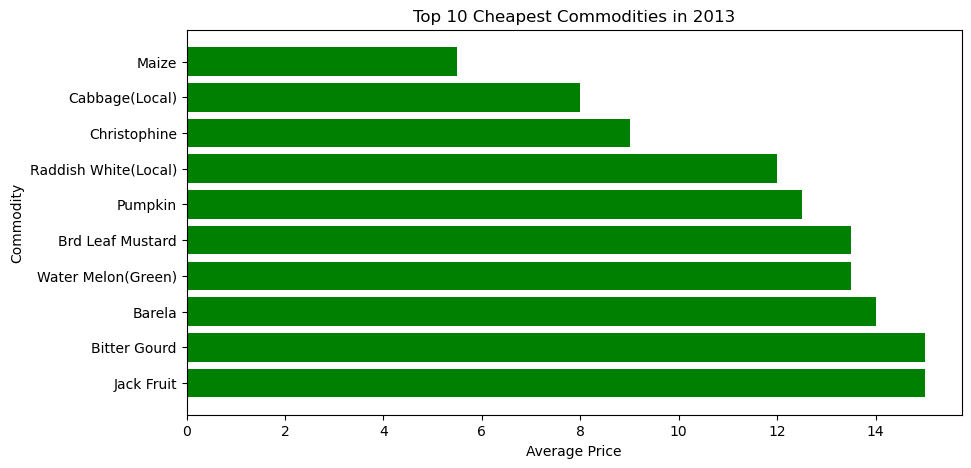

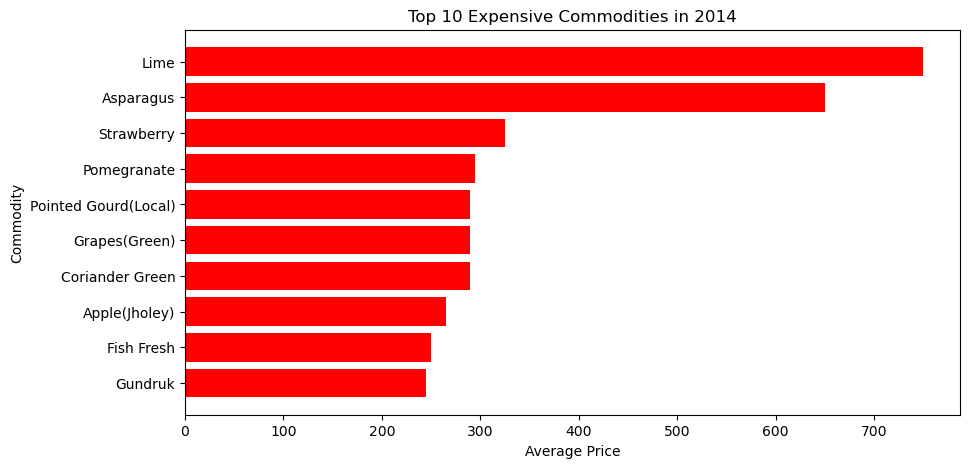

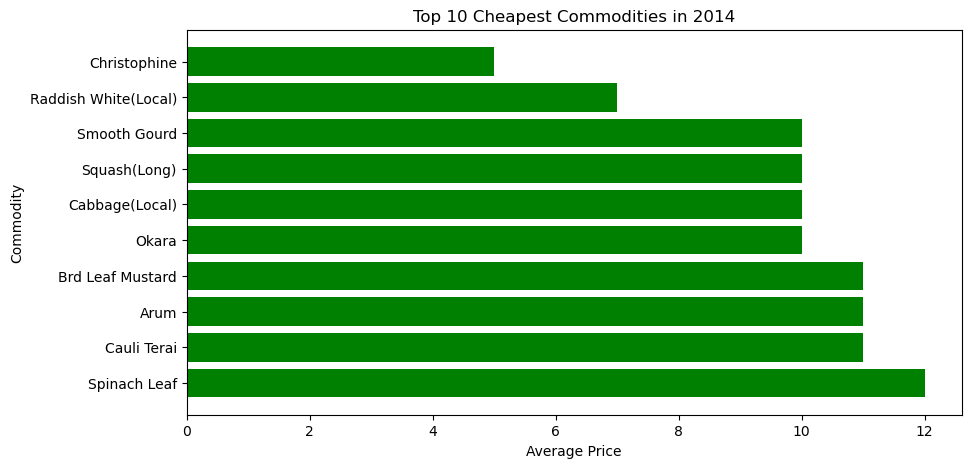

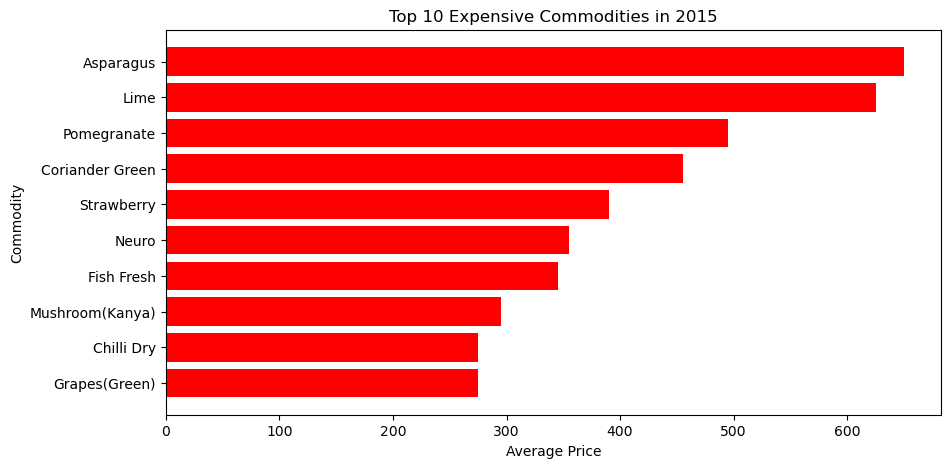

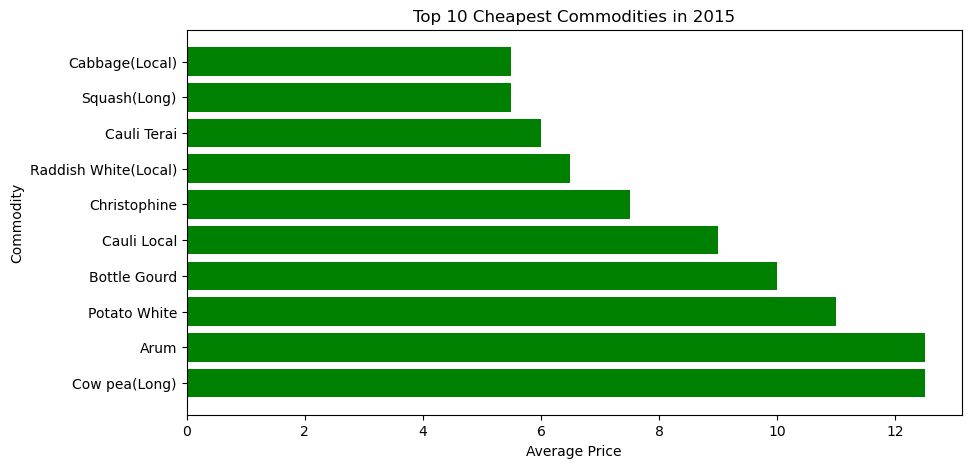

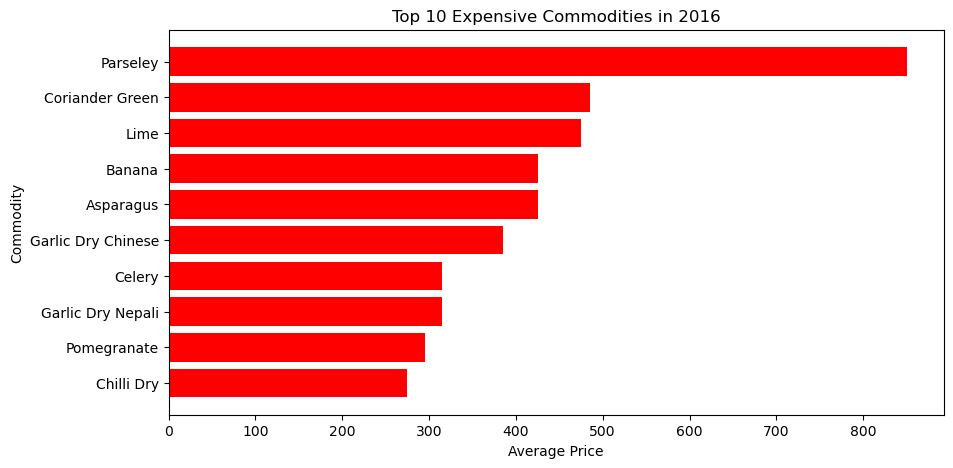

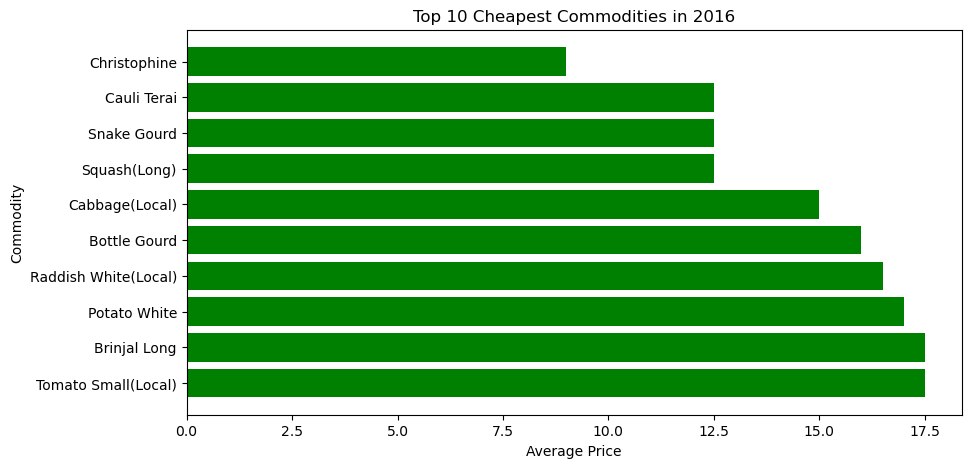

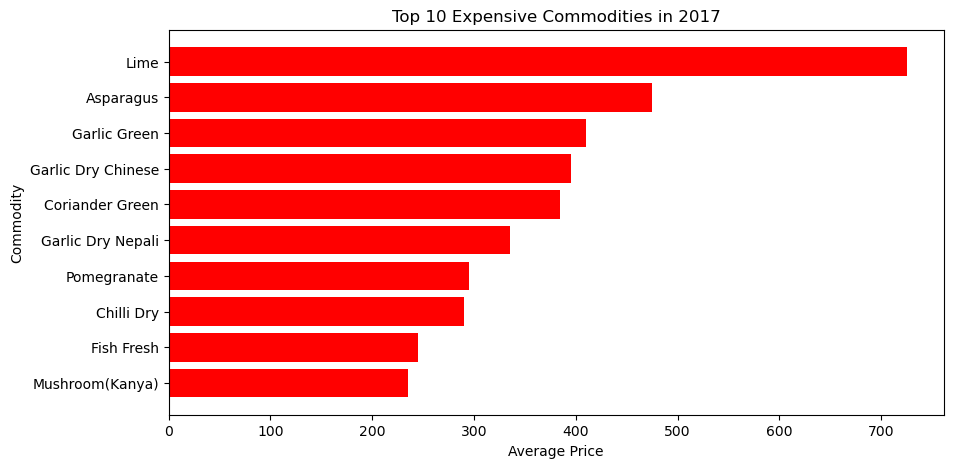

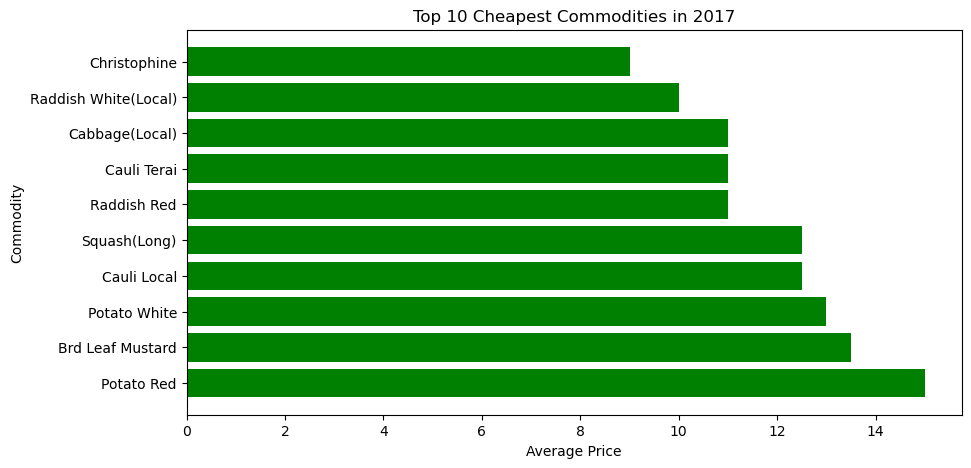

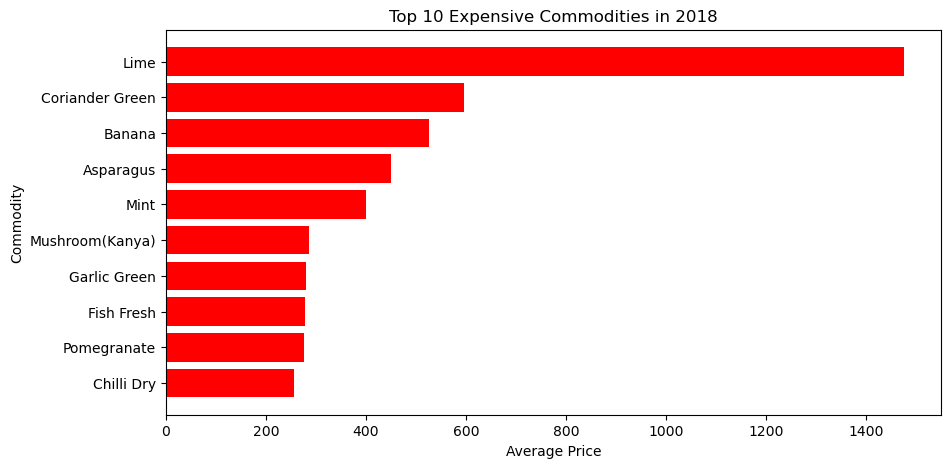

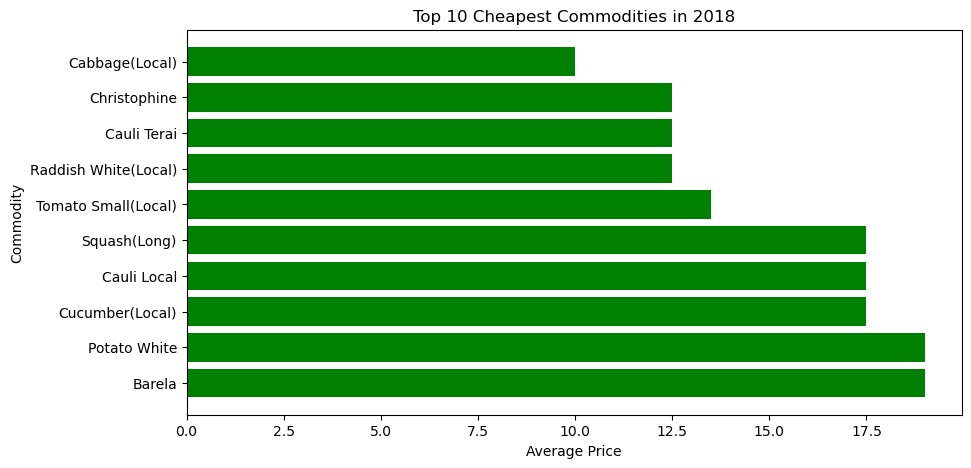

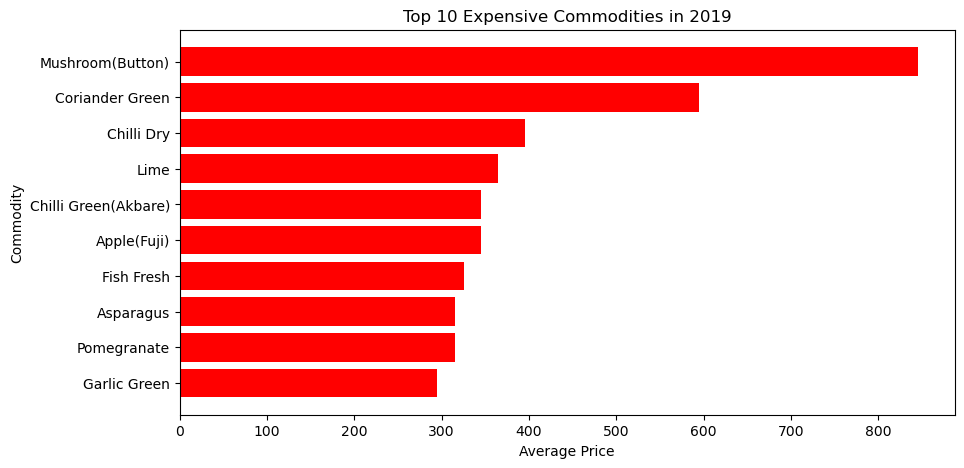

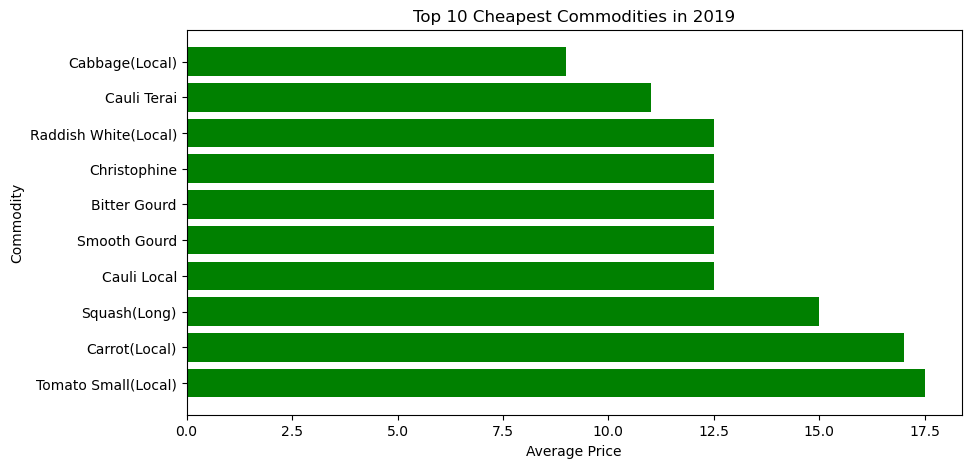

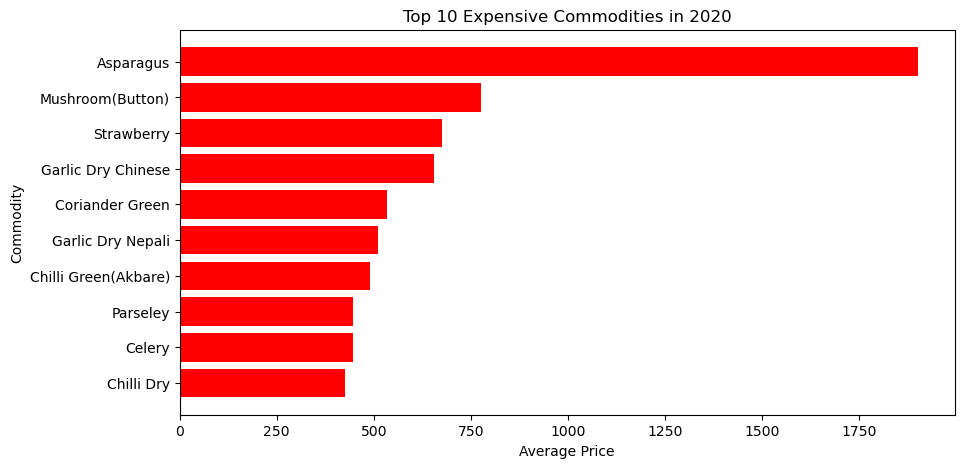

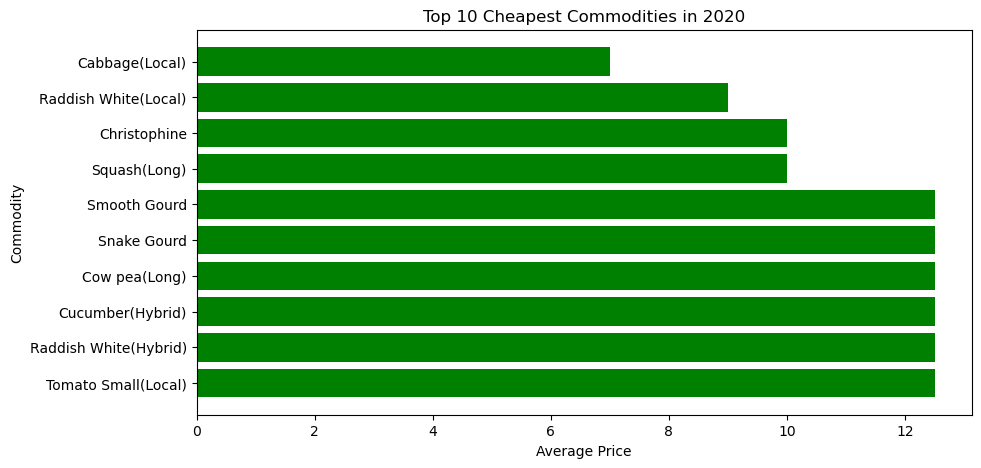

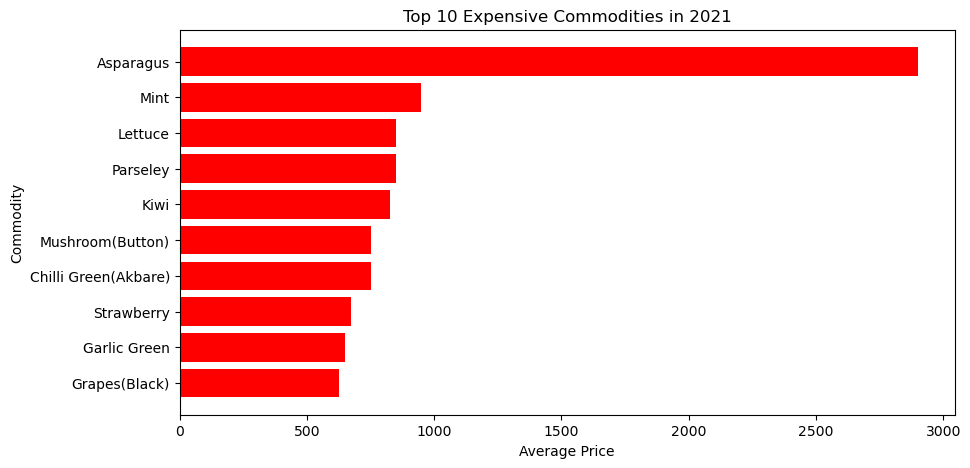

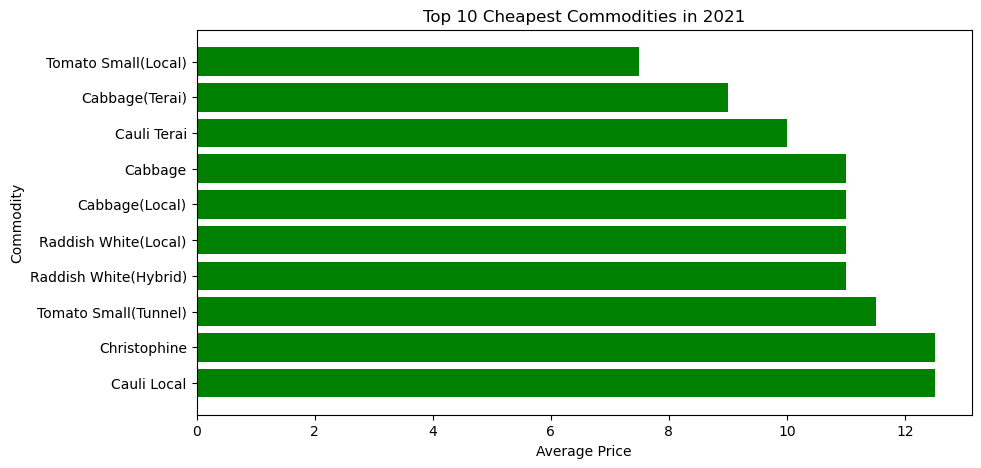

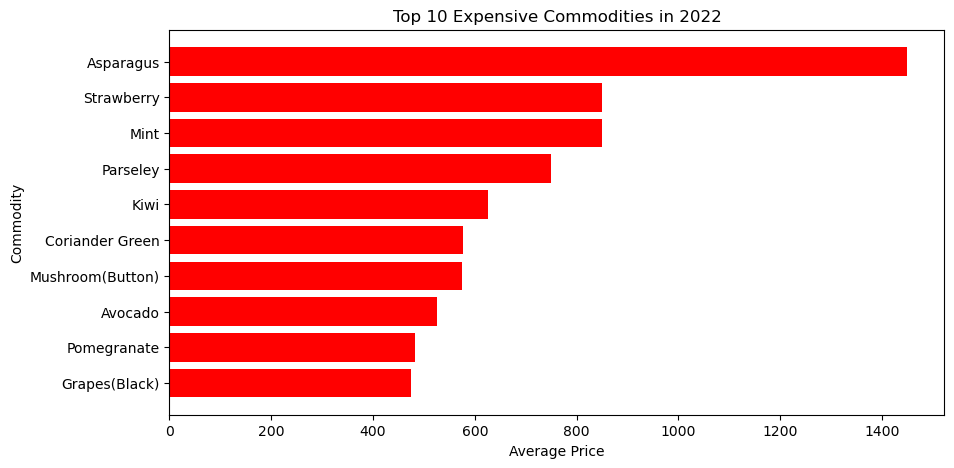

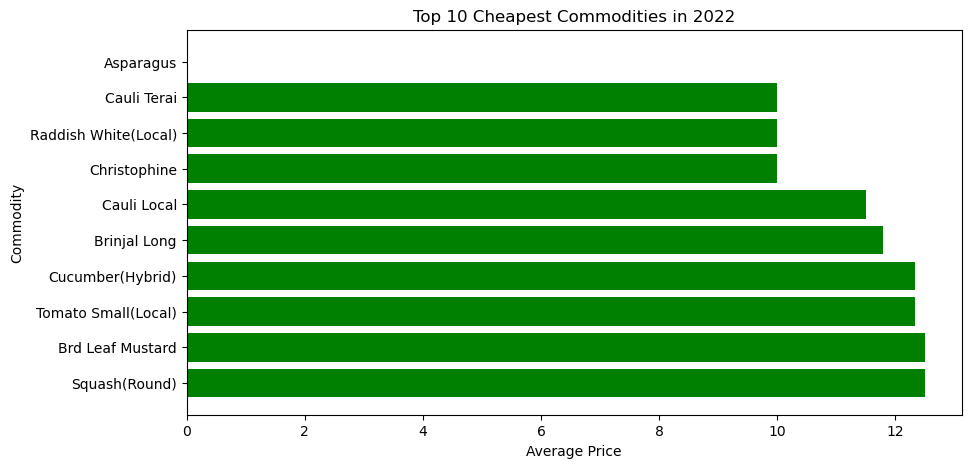

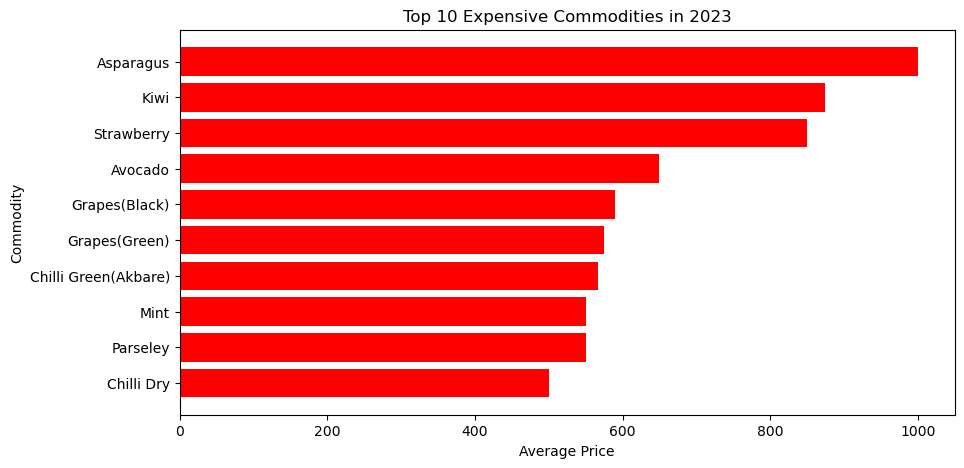

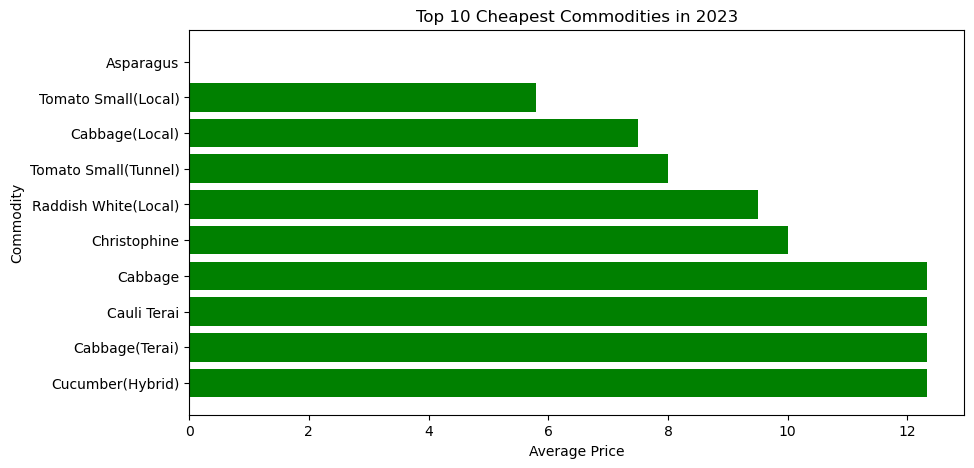

In [62]:
# Iterate through each year and get top 10 high and low priced commodities
for year in df1['Year'].unique():
    df_year = df1[df1['Year'] == year]  # Filter data for the year
    
    # Get unique top 10 expensive commodities
    top_high = df_year.sort_values(by='Average', ascending=False).drop_duplicates(subset=['Commodity']).head(10)
    top_low = df_year.sort_values(by='Average', ascending=True).drop_duplicates(subset=['Commodity']).head(10)
    
    top_high_prices[year] = top_high
    top_low_prices[year] = top_low

    # High Price Visualization
    plt.figure(figsize=(10, 5))
    plt.barh(top_high['Commodity'], top_high['Average'], color='red')
    plt.xlabel("Average Price")
    plt.ylabel("Commodity")
    plt.title(f"Top 10 Expensive Commodities in {year}")
    plt.gca().invert_yaxis()
    plt.show()

    # Low Price Visualization
    plt.figure(figsize=(10, 5))
    plt.barh(top_low['Commodity'], top_low['Average'], color='green')
    plt.xlabel("Average Price")
    plt.ylabel("Commodity")
    plt.title(f"Top 10 Cheapest Commodities in {year}")
    plt.gca().invert_yaxis()
    plt.show()
    print(" ")
    print(" ")
    print(" ")
    print(" ")
    